## Homework 2 for Perspective Winter 2020
### Qian Zhang

## Question 2

### Ex 2.1 (a)

In [4]:
#这部分主要是积分的各种simulation

from matplotlib import pyplot as plt
import numpy as np

# newton的方法

def func_newton(g,a,b,n,method):#n个点
    
    # midpoint 的方法 gxi是原函数
    
    if method=='midpoint':
        ans_mid=0
        for i in range(n):
            xi=a+((2*i+1)*(b-a)/(2*n))
            ans_mid+=(b-a)*g(xi)/n
        return ans_mid
    
    # trapezoid的方法
    
    elif method=='trapezoid':
        ans_tra=0
        for i in range(n+1):
            xi=a+(b-a)*i/n
            if i==0:
                ans_tra+=g(xi)
            elif i==n:
                ans_tra+=g(xi)
            else:
                ans_tra+=2*g(xi)
        return ans_tra*(b-a)/(2*n)
    
    # simpson的方法
    
    else:
        ans_sim=0
        for i in range(2*n+1):
            xi=a+(b-a)*i/(n*2)
            if i==0:
                ans_sim+=(b-a)*g(xi)/(6*n)
            elif i==2*n:
                ans_sim+=(b-a)*g(xi)/(6*n)
            elif i%2==1:
                ans_sim+=(b-a)*4*g(xi)/(6*n)
            elif i%2==0:
                ans_sim+=(b-a)*2*g(xi)/(6*n)
        return ans_sim

    
gx=lambda x:0.1*x**4-1.5*x**3+0.53*x**2+2*x+1

# gx用lambda来变得callable

n=200
print('Given N=200')
print('midpoint approximation is: ',func_newton(gx,-10,10,n,'midpoint'))
print('trapezoid approximation is: ',func_newton(gx,-10,10,n,'trapezoid'))
print('simpson approximation is: ',func_newton(gx,-10,10,n,'simpson'))

from scipy import integrate

value=4373+1/3
print()
print('true value is: ',value)
print()
print('midpoint absolute error is: ',abs(func_newton(gx,-10,10,n,'midpoint')-value))
print('trapezoid absolute error is: ',abs(func_newton(gx,-10,10,n,'trapezoid')-value))
print('simpson absolute error is: ',abs(func_newton(gx,-10,10,n,'simpson')-value))

Given N=200
midpoint approximation is:  4372.991172499995
trapezoid approximation is:  4374.01766
simpson approximation is:  4373.333335

true value is:  4373.333333333333

midpoint absolute error is:  0.34216083333831193
trapezoid absolute error is:  0.6843266666674026
simpson absolute error is:  1.6666672308929265e-06


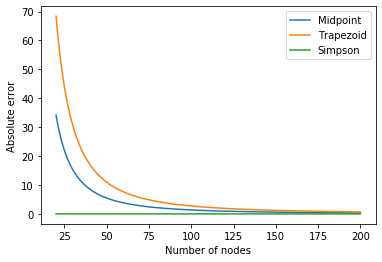

In [5]:
# np.arange 从20到200 step1

Nvec = np.arange(20, 201, 1)
er_midp=np.zeros(0)
er_trape=np.zeros(0)
er_simp=np.zeros(0)

for i in range (20,201):
    er_midp=np.append(er_midp,abs(func_newton(gx,-10,10,i,'midpoint')-4373-1/3))
    er_trape=np.append(er_trape,abs(func_newton(gx,-10,10,i,'trapezoid')-4373-1/3))
    er_simp=np.append(er_simp,abs(func_newton(gx,-10,10,i,'simpson')-4373-1/3))

#plot
plt.plot(Nvec,er_midp,label='Midpoint')
plt.plot(Nvec,er_trape,label='Trapezoid')
plt.plot(Nvec,er_simp,label='Simpson')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Absolute error')
plt.show()

### Ex 2.1 (b)

    fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.15827356e-12])
       r: array([6.29803361])
  status: 1
 success: True
       x: array([1.61091999])

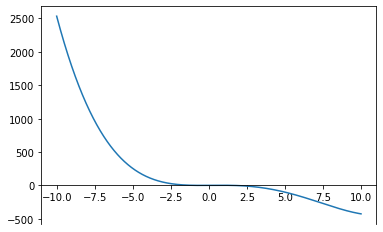

In [6]:
# 画图先画点

pt=np.linspace(-10,10,10000)
fpt=gx(pt)
plt.gca().spines['bottom'].set_position('zero')
plt.plot(pt,fpt)

import scipy.optimize as opt

# opt.root（原函数，init guess）求根，但只能出一个

opt.root(gx,2)

From the plot above, we know that the convex and concave parts can be considered symmetric, but the curving scale of concave part is much larger than the convex part. Therefore, the error of Trapezoid method is the largest among all the three methods.

Also, Simpson method has the smallest error, since it is a non-linear simulation on g(x), adding that g(x) is also non-linear, so it is closer to the true value. 

For such reasons, the rank of three method is (from best to worst) Simpson, Midpoint, Trapezoid.

### Ex 2.2


1
2
3
4
5
6
7
8
9
Node 1: 0.5, Weight 1: 0.0034669738030406686
Node 2: 1.4, Weight 2: 0.014397446759775888
Node 3: 2.3, Weight 3: 0.04894278070604151
Node 4: 3.2, Weight 4: 0.11725292407790144
Node 5: 4.1, Weight 5: 0.19802845246428785
Node 6: 5.0, Weight 6: 0.2358228443779054
Node 7: 5.9, Weight 7: 0.19802845246428774
Node 8: 6.8, Weight 8: 0.1172529240779015
Node 9: 7.7, Weight 9: 0.04894278070604152
Node 10: 8.6, Weight 10: 0.014397446759775863
Node 11: 9.5, Weight 11: 0.0034669738030406183
0.9999999999999999


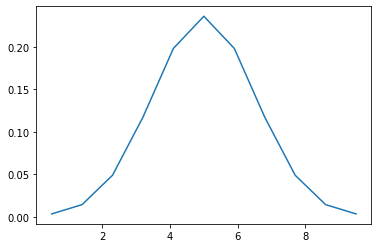

In [19]:
# 估计正态分布的node上的weight

import numpy as np
def func_normal(mean,sd,n,k): 
    
    from scipy.stats import norm
    
    # left和right是根据sigma来决定的
    
    weight=[]
    node=[]
    left=mean-k*sd
    right=mean+k*sd
    z=np.linspace(left,right,n)
    
    # norm.cdf的方法 （number，loc=mean, scale=sd)
    
    #0-10 一共11个点
    
    #z1
    node.append(z[0])
    weight.append(norm.cdf((z[0]+z[1])/2,mean,sd))
    
    #z2-z_n-1
    for i in range(1,n-1):
        print(i)
        node.append(z[i])
        zmin=(z[i-1]+z[i])/2
        zmax=(z[i]+z[i+1])/2
        normalfunc=lambda x: norm.pdf(x,mean,sd)
        
        # scipy的integrate.quad(fx, bottom, top) 出一个tuple 积分方法
        
        weight.append(integrate.quad(normalfunc,zmin,zmax)[0])
        
    #zn
    node.append(z[-1])
    weight.append(1-norm.cdf((z[-1]+z[-2])/2,mean,sd))
    
    return node,weight

#print nodes and weights
node,weight=func_normal(5,1.5,11,3)
n=11
su=0

# weight的点的sum应该是1
# sigma node*weight 是期望=mu

for i in range(n):
    print('Node {}: {}, Weight {}: {}'.format(i+1,node[i],i+1,weight[i]))
    su=su+weight[i]
print(su)
#plot
plt.plot(node,weight)
plt.show()


### Ex 2.3

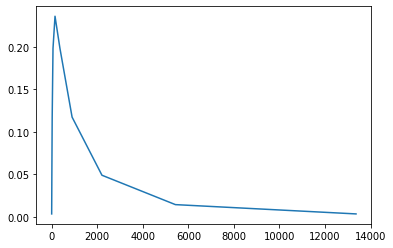

Node_log 1: 1.6487212707001282, Weight 1: 0.0034669738030406686
Node_log 2: 4.0551999668446745, Weight 2: 0.014397446759775888
Node_log 3: 9.974182454814718, Weight 3: 0.04894278070604151
Node_log 4: 24.532530197109352, Weight 4: 0.11725292407790144
Node_log 5: 60.34028759736195, Weight 5: 0.19802845246428785
Node_log 6: 148.4131591025766, Weight 6: 0.2358228443779054
Node_log 7: 365.0374678653289, Weight 7: 0.19802845246428774
Node_log 8: 897.8472916504176, Weight 8: 0.1172529240779015
Node_log 9: 2208.347991887209, Weight 9: 0.04894278070604152
Node_log 10: 5431.659591362978, Weight 10: 0.014397446759775863
Node_log 11: 13359.726829661873, Weight 11: 0.0034669738030406183


In [5]:
# node直接e^z

def func_lognormal(mean,sd,n,k): 
    node,weight=func_normal(mean,sd,n,k)
    A=np.exp(node)
    return A,weight

A,weight_log=func_lognormal(5,1.5,11,3)
#plot
plt.plot(A,weight_log)
plt.show()

n=11
for i in range(n):
    print('Node_log {}: {}, Weight {}: {}'.format(i+1,A[i],i+1,weight_log[i]))



### Ex 2.4

In [6]:
nodes,wei=func_lognormal(10.5,0.8,11,3)
evalue=0

#计算期望=sigma（pr*node），or 积分xfx

for j in range(11):
    evalue+=nodes[j]*wei[j]
tvalue=(np.exp(10.5+0.8**2/2))

print('Approximation is {}\nTrue value is {}\nAbsolute error is {}'.format(evalue,tvalue,abs(evalue-tvalue)))

Approximation is 50352.456192765894
True value is 50011.087008521754
Absolute error is 341.36918424414034


The approximation is not that accurate, with the error of 341.36918424414034.

### Ex 3.1

In [7]:
# 高斯估计

from scipy import integrate as inte
from scipy import optimize as opt
def hx(n):
    return lambda x: x**n

# 几个para几个方程
# 先决定N，就有几个w和几个x的点，再决定方程

def func_gau(x):
    return [x[0]+x[1]+x[2]-inte.quad(hx(0),-10,10)[0],x[0]*x[3]+x[1]*x[4]+x[2]*x[5]-inte.quad(hx(1),-10,10)[0],
           x[0]*(x[3]**2)+x[1]*(x[4]**2)+x[2]*(x[5]**2)-inte.quad(hx(2),-10,10)[0],
           x[0]*(x[3]**3)+x[1]*(x[4]**3)+x[2]*(x[5]**3)-inte.quad(hx(3),-10,10)[0],
           x[0]*(x[3]**4)+x[1]*(x[4]**4)+x[2]*(x[5]**4)-inte.quad(hx(4),-10,10)[0],
           x[0]*(x[3]**5)+x[1]*(x[4]**5)+x[2]*(x[5]**5)-inte.quad(hx(5),-10,10)[0]]

# root可以解决一个list的func，w1,w2,w3,x1,x2,x3

x_sol=opt.root(func_gau,[2,3,5,6,7,6])

print('The solution for the function system is \n{}'.format(x_sol.x))

# gausian estimate = sigma (wi*g(xi))

gau_eval_val=0
for i in range(3):
    gau_eval_val+=x_sol.x[i]*gx(x_sol.x[i+3])

true_val=4373+1/3
print()
print ('Gaussian approximation is {},\nAbsolute error from true value is {}'.format(gau_eval_val,abs(gau_eval_val-true_val)))


The solution for the function system is 
[ 5.55555556e+00  5.55555556e+00  8.88888889e+00 -7.74596669e+00
  7.74596669e+00 -1.66429002e-10]

Gaussian approximation is 4373.333333278705,
Absolute error from true value is 5.462788976728916e-08


Compared with the approximations in Ex 2.1 given N=200, the Gaussian one is performing better than all the three methods in Ex 2.1. Therefore, among all the approximation methods, the Gaussian performs best, followed by Simpson, Midpoint, and Trapezoid. Moreover, we only use a small N to approximate Gaussian estimate, so if given some other N in Gaussian or the three methods in Ex 2.1, the result may be different. 

### Ex 3.2

In [8]:
from scipy.integrate import quad

# quad里面的fx是lambdify的

gx = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x+ 1
gau_quad = quad(gx, -10, 10)[0]
print('The absolute error is', abs(gau_quad-4373-1/3))

The absolute error is 6.063483048990292e-13


The error is extremely small by `scipy.integrate.quad`.

### Ex 4.1

In [9]:
# 估计pi的蒙特卡洛方法

import scipy.stats as sts
import numpy as np

g_pi=lambda x,y: x**2+y**2

def appro_pi(g,domain,n):
    n_in = 0
    mc_draw_x=np.random.uniform(domain[0][0],domain[0][1],n)
    mc_draw_y=np.random.uniform(domain[1][0],domain[1][1],n)
    
    n_in=np.sum(g(mc_draw_x,mc_draw_y)<=1) # true 1 false 0
    
    return n_in*(domain[0][1]-domain[0][0])*(domain[1][1]-domain[1][0])/n  # 4是默认domain在-1，1，-1，1的

maxn=1
np.random.seed(seed=25)
value_eval=appro_pi(g_pi,[[-1,1],[-1,1]],maxn)


while round(value_eval,4)!=3.1415: #到第四位
    maxn+=1
    value_eval=appro_pi(g_pi,[[-1,1],[-1,1]],maxn)
print ('The smallest N is: ',maxn,', and the approxomation is: ',value_eval) 

The smallest N is:  615 , and the approxomation is:  3.1414634146341465


### Ex 4.2

In [13]:
# 判断是否是质数

def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False
    return True

# 取质数的list

def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2
    return primes_vec

In [14]:
# d个dimension，第n个vector 
# quasi 蒙特卡洛的四种方法，本质上也是取随机数，但是有一定的公式


def func_equi(n,d,seq='weyl'):
    # weyl
    if seq=='weyl':
        value=np.sqrt(primes_ascend(d))*n
        
        # np.floor是向下取整
        
        weyl=value-np.floor(value)
        return weyl
    #haber
    elif seq=='haber':
        value=np.sqrt(primes_ascend(d))*n*(n+1)/2
        haber=value-np.floor(value)
        return haber
    #nie
    elif seq=='nie':
        value=n*(2**(np.arange(1,d+1)/(d+1)))
        nie=value-np.floor(value)
        return nie
    #baker
    else:
        value=n*(np.exp(primes_ascend(d)))
        baker=value-np.floor(value)
        return baker


print ('weyl: ',func_equi(1073,2,'weyl'))
print ('haber: ',func_equi(20,5,'haber'))
print ('nie: ',func_equi(20,5,'nie'))
print ('baker: ',func_equi(20,5,'baker'))

weyl:  [0.45115243 0.49051652]
haber:  [0.9848481  0.73066959 0.57427527 0.60777532 0.49120597]
nie:  [0.44924097 0.198421   0.28427125 0.74802104 0.63594873]
baker:  [0.78112198 0.71073846 0.26318205 0.66316857 0.83430396]


In [15]:
# test plot

x_1 = []
y_1 = []
x_2 = []
y_2 = []
x_3 = []
y_3 = []
x_4 = []
y_4 = []

for i in range(0, 1000):
    x_1.append(func_equi(i, 2,seq='weyl')[0])
    y_1.append(func_equi(i, 2,seq='weyl')[1])
    x_2.append(func_equi(i, 2, seq='haber')[0])
    y_2.append(func_equi(i, 2, seq='haber')[1])
    x_3.append(func_equi(i, 2, seq='nie')[0])
    y_3.append(func_equi(i, 2, seq='nie')[1])    
    x_4.append(func_equi(i, 2, seq='baker')[0])
    y_4.append(func_equi(i, 2, seq='baker')[1])

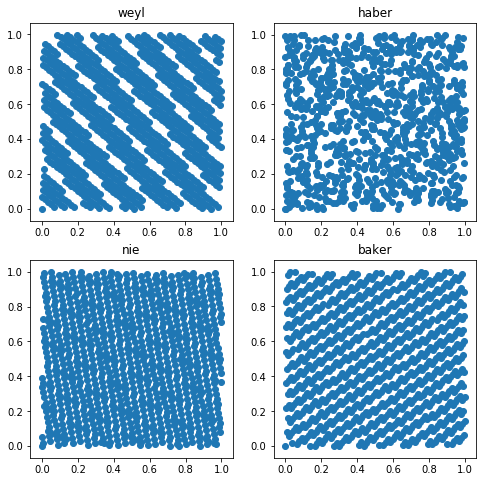

In [17]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221) #2*2的布局的第一个位置

# plot是折线图，scatter散点图，基本能覆盖domain

ax1.scatter(x_1, y_1)
ax1.set_title("weyl")
ax2 = fig.add_subplot(222)
ax2.scatter(x_2, y_2)
ax2.set_title("haber")
ax3 = fig.add_subplot(223)
ax3.scatter(x_3, y_3)
ax3.set_title("nie")
ax4 = fig.add_subplot(224)
ax4.scatter(x_4, y_4)
ax4.set_title("baker")
plt.show()

### Ex 4.3

In [14]:
np.random.seed(25)

In [15]:
g_pii=lambda x,y:x**2+y**2<=1

# 用某个方法估计pi
# 默认func——equi是估计【0，1】的一个list，所以domian出来要加范围

def func_equi_pi(g,domain,n,seq):
    
    xb=domain[0][0]
    xt=domain[0][1]
    yb=domain[1][0]
    yt=domain[1][1]
    if seq=='weyl':
        x_1 = np.array([2*func_equi(i, 2,'weyl')[0] -1 for i in range(n)])
        y_1 = np.array([2*func_equi(i, 2,'weyl')[1] -1 for i in range(n)])
    elif seq=='haber':
        x_1 = np.array([(xt-xb)*func_equi(i, 2,'haber')[0] + xb for i in range(n)])
        y_1 = np.array([(yt-yb)*func_equi(i, 2,'haber')[1] + yb for i in range(n)])
    elif seq=='nie':
        x_1 = np.array([(xt-xb)*func_equi(i, 2,'nie')[0] + xb for i in range(n)])
        y_1 = np.array([(yt-yb)*func_equi(i, 2,'nie')[1] + yb for i in range(n)])
    elif seq=='baker':
        x_1 = np.array([(xt-xb)*func_equi(i, 2,'baker')[0] + xb for i in range(n)])
        y_1 = np.array([(yt-yb)*func_equi(i, 2,'baker')[1] + yb for i in range(n)])
    
    area=(xt-xb)*(yt-yb)
    #print(area)
    return area*np.sum(g(x_1,y_1))/n

t1=t2=t3=t4=True

j=1
while round(func_equi_pi(g_pii,[[-1,1],[-1,1]],j,"weyl"),4)!=3.1415:
    j+=1
    if j>1000000:
        print ('Does not converge to 3.1415 by finite draws')
        t1=False
        break
if t1:
    print("The smallest number of Weyl is", j, 'and approximation is: ', func_equi_pi(g_pii,[[-1,1],[-1,1]],j,"weyl"))

j=1
while round(func_equi_pi(g_pii,[[-1,1],[-1,1]],j,'haber'),4)!=3.1415:
    j+=1  
    if j>1000000:
        print ('Does not converge to 3.1415 by finite draws')
        t2=False
        break
if t2:
    print("The smallest number of Haber is", j, 'and approximation is: ',func_equi_pi(g_pii,[[-1,1],[-1,1]],j,"haber"))

j=1
while round(func_equi_pi(g_pii,[[-1,1],[-1,1]],j,'nie'),4)!=3.1415:
    j+=1  
    if j>1000000:
        print ('Does not converge to 3.1415 by finite draws')
        t3=False
        break
if t3:
    print("The smallest number of Nie is", j,'and approximation is: ', func_equi_pi(g_pii,[[-1,1],[-1,1]],j,"nie"))

j=1
while round(func_equi_pi(g_pii,[[-1,1],[-1,1]],j,'baker'),4)!=3.1415:
    j+=1  
    if j>1000000:
        print ('Does not converge to 3.1415 by finite draws')
        t4=False
        break
if t4:
    print("The smallest number of Baker is", j,'and approximation is: ', func_equi_pi(g_pii,[[-1,1],[-1,1]],j,"baker"))



The smallest number of Weyl is 1230 and approximation is:  3.1414634146341465
The smallest number of Haber is 2064 and approximation is:  3.141472868217054
The smallest number of Nie is 1845 and approximation is:  3.1414634146341465
The smallest number of Baker is 1272 and approximation is:  3.141509433962264


Compared with the four quasi-MC methods, the Weyl method has the fastest rate of convergence, followed by Baker, Niederreiter,and Haber method.

In [1]:
def pows(x,y):
    return x**y

paras=[4,3]
pows(paras) #直接放paras有问题，因为list只占一个位置，但pows有俩

TypeError: pows() missing 1 required positional argument: 'y'

In [2]:
pows(*paras) #调用函数的时候*是用来unpack的，这里等价于pows（4，3）

64